In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [63]:
df = pd.read_csv('train_1.csv', parse_dates=['datetime'])
df_test = pd.read_csv('test.csv', parse_dates=['datetime'])

In [64]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [66]:
columns = ['count', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek','hour']

cols_normalize = ['temp','atemp','humidity','windspeed']

In [67]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [68]:
def add_features(df):
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['dayofweek'] = df['datetime'].dt.dayofweek
    df['hour'] = df['datetime'].dt.hour

In [69]:
add_features(df)
add_features(df_test)

In [70]:
#target 변수에 log(x+1)취함
df['count'] = df['count'].map(np.log1p)
df['count']

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
10881    5.820083
10882    5.488938
10883    5.129899
10884    4.867534
10885    4.488636
Name: count, Length: 10886, dtype: float64

In [71]:
#noramalize the dataset
transformer = MinMaxScaler()

In [72]:
transformer.fit(df[cols_normalize])

MinMaxScaler()

In [73]:
def transform_data(scaler, df, columns):
    transformed_data = scaler.transform(df[columns])
    df_transformed = pd.DataFrame(transformed_data, columns=columns)
    
    for col in df_transformed.columns:
        df[col] = df_transformed[col]

In [74]:
columns = ['count', 'season', 'holiday', 'workingday', 'weather','year', 'month', 'day', 'dayofweek','hour']

# PCA Training
columns_for_pca = ['temp','atemp','humidity','windspeed']

In [75]:
pca = PCA(n_components=0.9)
pca

PCA(n_components=0.9)

In [76]:
pca.fit(df[columns_for_pca])

PCA(n_components=0.9)

In [77]:
print ('Variance: ', pca.n_components)
print ('No. of components to keep: ', pca.n_components_)

Variance:  0.9
No. of components to keep:  3


In [78]:
def transform_with_pca(pca, df, columns):
    transformed_data = pca.transform(df[columns])
    
    tcols = []
    for i in range(pca.n_components_):
        tcols.append('component_' + str(i))
        
    print('component:', tcols)
    df_transformed = pd.DataFrame(transformed_data, columns=tcols)
    
    for col in df_transformed.columns:
        df[col] = df_transformed[col]
    
    df.drop(columns, inplace=True, axis=1)
    
    return tcols

In [79]:
new_cols = transform_with_pca(pca, df, columns_for_pca)

component: ['component_0', 'component_1', 'component_2']


In [80]:
transform_with_pca(pca, df_test, columns_for_pca)

component: ['component_0', 'component_1', 'component_2']


['component_0', 'component_1', 'component_2']

In [81]:
df.head()

,datetime,season,holiday,workingday,weather,casual,registered,count,year,month,day,dayofweek,hour,component_0,component_1,component_2
0,2011-01-01 00:00:00,1,0,0,1,3,13,2.833213,2011,1,1,5,0,-21.502153,12.132739,-10.598772
1,2011-01-01 01:00:00,1,0,0,1,8,32,3.713572,2011,1,1,5,1,-20.566211,13.274817,-10.846065
2,2011-01-01 02:00:00,1,0,0,1,5,27,3.496508,2011,1,1,5,2,-20.566211,13.274817,-10.846065
3,2011-01-01 03:00:00,1,0,0,1,3,10,2.639057,2011,1,1,5,3,-15.583428,12.325531,-11.563773
4,2011-01-01 04:00:00,1,0,0,1,0,1,0.693147,2011,1,1,5,4,-15.583428,12.325531,-11.563773


In [82]:
for col in new_cols:
    columns.append(col)

In [83]:
columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour',
 'component_0',
 'component_1',
 'component_2']

In [84]:
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]

rows = df.shape[0]
train = int(.7 * rows)
test = int(.3 * rows)

In [85]:
rows, train, test

(10886, 7620, 3265)

In [87]:
df[:train].to_csv('bike_train_pca.csv', index=False, header=False, columns=columns)

In [88]:
df[train:].to_csv('bike_validation_pca.csv', index=False, header=False, columns=columns)

In [89]:
#write column list
with open('bike_train_column_list_pca.txt', 'w') as f:
    f.write(','.join(columns))

In [90]:
import xgboost as xgb
%matplotlib inline
import sys

In [91]:
column_list_file = 'bike_train_column_list_pca.txt'
train_file = 'bike_train_pca.csv'
validation_file = 'bike_validation_pca.csv'
test_file = 'bike_test_pca.csv'

In [92]:
columns = ''
with open(column_list_file, 'r') as f:
    columns = f.read().split(',')

In [94]:
df_train = pd.read_csv(train_file, names=columns)
df_validation = pd.read_csv(validation_file, names=columns)

In [95]:
df_train.head()

,count,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2
0,4.477337,3,0,0,2,2011,9,3,5,0,-11.476381,-9.758820,-3.241009
1,5.517453,3,0,1,1,2012,8,13,0,14,28.342496,-16.225009,-9.041947
2,5.814131,4,0,0,1,2011,11,5,5,17,21.029937,6.594147,-5.765722
3,6.436150,3,0,1,1,2012,8,9,3,19,7.671534,-18.668738,0.512536
4,4.262680,2,0,1,1,2011,4,14,3,6,-15.235248,7.881643,-4.112557


In [96]:
X_train = df_train.iloc[:, 1:]
y_train = df_train.iloc[:,0].ravel() #flatten 
X_validation = df_validation.iloc[:, 1:]
y_validation = df_validation.iloc[:, 0].ravel()

In [98]:
regressor = xgb.XGBRegressor(max_depth=5, eta=0.1, subsample=0.7, num_round=150, n_estimators=150)

In [99]:
regressor

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, eta=0.1, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=5,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             num_round=150, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=0.7, tree_method=None,
             validate_parameters=None, verbosity=None)

In [100]:
regressor.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)])

[15:55:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { num_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-rmse:3.90563	validation_1-rmse:3.91574
[1]	validation_0-rmse:3.52677	validation_1-rmse:3.53506
[2]	validation_0-rmse:3.18664	validation_1-rmse:3.19358
[3]	validation_0-rmse:2.87978	validation_1-rmse:2.88530
[4]	validation_0-rmse:2.60421	validation_1-rmse:2.60868
[5]	validation_0-rmse:2.35866	validation_1-rmse:2.36257
[6]	validation_0-rmse:2.13675	validation_1-rmse:2.14072
[7]	validation_0-rmse:1.93831	validation_1-rmse:1.94170
[8]	validation_0-rmse:1.76050	validation_1-rmse:1.76411
[9]	validation_0-rmse:1.59991	validation_1-rmse:1.60308
[10]	validation_0-rmse:1.45576	validation_1-rmse:1.45

[137]	validation_0-rmse:0.22683	validation_1-rmse:0.29150
[138]	validation_0-rmse:0.22668	validation_1-rmse:0.29146
[139]	validation_0-rmse:0.22608	validation_1-rmse:0.29149
[140]	validation_0-rmse:0.22581	validation_1-rmse:0.29153
[141]	validation_0-rmse:0.22531	validation_1-rmse:0.29148
[142]	validation_0-rmse:0.22489	validation_1-rmse:0.29158
[143]	validation_0-rmse:0.22453	validation_1-rmse:0.29155
[144]	validation_0-rmse:0.22419	validation_1-rmse:0.29130
[145]	validation_0-rmse:0.22318	validation_1-rmse:0.29077
[146]	validation_0-rmse:0.22228	validation_1-rmse:0.29030
[147]	validation_0-rmse:0.22199	validation_1-rmse:0.29028
[148]	validation_0-rmse:0.22155	validation_1-rmse:0.28997
[149]	validation_0-rmse:0.22100	validation_1-rmse:0.28985


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=150, n_jobs=0, num_parallel_tree=1, num_round=150,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [101]:
eval_result = regressor.evals_result()
training_rounds = range(len(eval_result['validation_0']['rmse']))

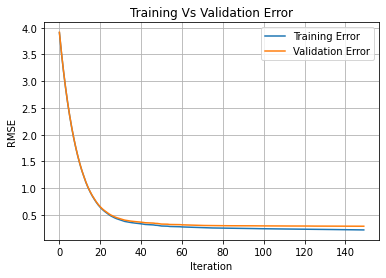

In [103]:
plt.plot(training_rounds,eval_result['validation_0']['rmse'],label='Training Error')
plt.plot(training_rounds,eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()

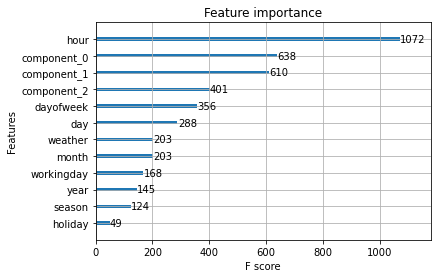

In [131]:
xgb.plot_importance(regressor)

In [120]:
df = pd.read_csv(validation_file, names=columns)
df.head()

,count,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2
0,6.095825,3,0,1,2,2011,7,7,3,8,-16.276981,-13.342667,3.911471
1,5.961005,2,0,0,1,2011,6,11,5,13,7.671534,-18.668738,0.512536
2,1.098612,1,0,1,1,2011,2,14,0,2,22.333884,10.107577,2.912159
3,3.891820,1,0,1,1,2011,2,8,1,10,17.691233,20.698390,20.067608
4,4.025352,4,0,0,1,2011,12,4,6,8,-27.370508,10.833676,-9.547505


In [121]:
X_test = df.iloc[:, 1:]
X_test[:5]

,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2
0,3,0,1,2,2011,7,7,3,8,-16.276981,-13.342667,3.911471
1,2,0,0,1,2011,6,11,5,13,7.671534,-18.668738,0.512536
2,1,0,1,1,2011,2,14,0,2,22.333884,10.107577,2.912159
3,1,0,1,1,2011,2,8,1,10,17.691233,20.698390,20.067608
4,4,0,0,1,2011,12,4,6,8,-27.370508,10.833676,-9.547505


In [122]:
result = regressor.predict(X_test)
result[:5]

array([6.031296 , 5.9272237, 1.4931023, 4.0158186, 4.409105 ],
      dtype=float32)

In [123]:
df['count_predicted'] = result
df['count_predicted'].describe()

count    3266.000000
mean        4.599140
std         1.362192
min         0.770209
25%         3.823976
50%         4.990810
75%         5.595113
max         6.813532
Name: count_predicted, dtype: float64

In [124]:
df[df['count_predicted'] < 0]

,count,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2,count_predicted


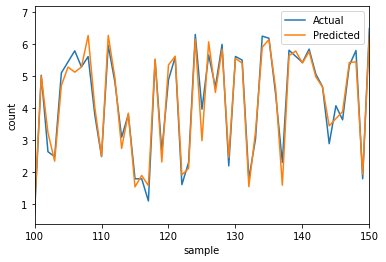

In [125]:
plt.plot(df['count'], label='Actual')
plt.plot(df['count_predicted'], label='Predicted')
plt.xlabel('sample')
plt.ylabel('count')
plt.xlim([100,150])
plt.legend()
plt.show()

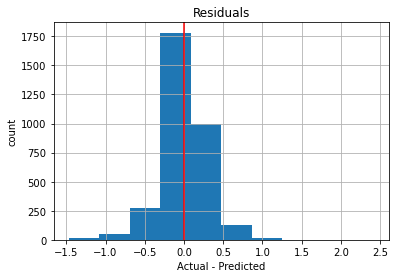

In [126]:
residuals = (df['count'] - df['count_predicted'])

plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('count')
plt.title('Residuals')
plt.axvline(color='r')
plt.show()

In [127]:
value_counts = (residuals > 0).value_counts(sort=False)
print(' Under Estimation: {0:0.2f}'.format(value_counts[True]/len(residuals)))
print(' Over  Estimation: {0:0.2f}'.format(value_counts[False]/len(residuals)))

 Under Estimation: 0.54
 Over  Estimation: 0.46


In [129]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("RMSE: {0:0.2f}".format(mean_squared_error(df['count'],df['count_predicted'])**.5))

RMSE: 0.29


In [105]:
def adjust_count(x):
    if x < 0:
        return 0
    else:
        return x

In [108]:
df_test.head()

,datetime,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2
0,2011-01-20 00:00:00,1,0,1,1,2011,1,20,3,0,7.202112,16.736082,10.901000
1,2011-01-20 01:00:00,1,0,1,1,2011,1,20,3,1,3.166753,12.943166,-14.591846
2,2011-01-20 02:00:00,1,0,1,1,2011,1,20,3,2,3.166753,12.943166,-14.591846
3,2011-01-20 03:00:00,1,0,1,1,2011,1,20,3,3,4.879866,14.396942,-3.798227
4,2011-01-20 04:00:00,1,0,1,1,2011,1,20,3,4,4.879866,14.396942,-3.798227


In [110]:
X_test = df_test.iloc[:, 1:]
X_test.head()

,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2
0,1,0,1,1,2011,1,20,3,0,7.202112,16.736082,10.901000
1,1,0,1,1,2011,1,20,3,1,3.166753,12.943166,-14.591846
2,1,0,1,1,2011,1,20,3,2,3.166753,12.943166,-14.591846
3,1,0,1,1,2011,1,20,3,3,4.879866,14.396942,-3.798227
4,1,0,1,1,2011,1,20,3,4,4.879866,14.396942,-3.798227


In [111]:
result = regressor.predict(X_test)

In [112]:
result

array([2.2724266, 1.8301077, 1.5003153, ..., 4.8580766, 4.5704656,
       4.210455 ], dtype=float32)

In [113]:
df_test['count'] = np.expm1(result)

In [114]:
df_test.head()

,datetime,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2,count
0,2011-01-20 00:00:00,1,0,1,1,2011,1,20,3,0,7.202112,16.736082,10.901000,8.702917
1,2011-01-20 01:00:00,1,0,1,1,2011,1,20,3,1,3.166753,12.943166,-14.591846,5.234558
2,2011-01-20 02:00:00,1,0,1,1,2011,1,20,3,2,3.166753,12.943166,-14.591846,3.483102
3,2011-01-20 03:00:00,1,0,1,1,2011,1,20,3,3,4.879866,14.396942,-3.798227,2.015676
4,2011-01-20 04:00:00,1,0,1,1,2011,1,20,3,4,4.879866,14.396942,-3.798227,1.919580


In [115]:
df_test[df_test['count'] < 0]

,datetime,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2,count


In [116]:
df_test['count'] = df_test['count'].map(adjust_count)

In [118]:
df_test[['datetime', 'count']].to_csv('predicted_count_pca.csv', index=False)

In [119]:
df_predicted = pd.read_csv('predicted_count_pca.csv')
df_predicted

,datetime,count
0,2011-01-20 00:00:00,8.702917
1,2011-01-20 01:00:00,5.234558
2,2011-01-20 02:00:00,3.483102
3,2011-01-20 03:00:00,2.015676
4,2011-01-20 04:00:00,1.919580
...,...,...
6488,2012-12-31 19:00:00,279.431549
6489,2012-12-31 20:00:00,173.867844
6490,2012-12-31 21:00:00,127.776276
6491,2012-12-31 22:00:00,95.589066
